# NY Times Covid-19 data analysis class
## Dr. Tirthajyoti Sarkar, Fremont, CA


## Imports

In [2]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

## `NTYCovid` class definition

In [3]:
class NYTCovid:
    def __init__(self):
        from datetime import date
        self.statedf = None
        self.countydf = None
        self._stateupdated = False
        self._countyupdated = False
        self._processed = False
        self._today = date.today()
    
    def today(self):
        print("Today is:",self._today)
    
    def updateState(self,
                     url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"):
        url = url
        s=requests.get(url).content
        self.statedf = pd.read_csv(io.StringIO(s.decode('utf-8')))
        self.statedf['date'] =  pd.to_datetime(self.statedf['date'], format='%Y-%m-%d')
        self._stateupdated = True
    
    def updateCounty(self,
                     url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"):
        url = url
        s=requests.get(url).content
        self.countydf = pd.read_csv(io.StringIO(s.decode('utf-8')))
        self.countydf['date'] =  pd.to_datetime(self.countydf['date'], format='%Y-%m-%d')
        self._countyupdated = True
    
    def dateUpdate(self):
        if self._stateupdated:
            print("Date of the latest data:",self.statedf.iloc[-1]['date'].date())
        else:
            print("Data has not been updated even once!")
    
    def peek(self):
        if self._stateupdated:
            print("First 5 rows of the state data")
            print("="*50)
            print(self.statedf.head())
        if self._countyupdated:
            print()
            print("First 5 rows of the county data")
            print("="*50)
            print(self.countydf.head())
    
    def process(self):
        pd.set_option('mode.chained_assignment', None)
        self.statedict= {}
        self.countydict= {}
        print("Processing...")
        t1 = time.time()
        if self._stateupdated:
            self.statelist = list(self.statedf['state'].unique())
            for s in self.statelist:
                state_df=self.statedf[self.statedf['state']==s]
                state_df['newcases'] = state_df['cases'].diff()
                state_df['newdeaths'] = state_df['deaths'].diff()
                self.statedict[s]=state_df
        if self._countyupdated:
            self.countylist = list(self.countydf['county'].unique())
            for c in self.countylist:
                county_df=self.countydf[self.countydf['county']==c]
                county_df['newcases'] = county_df['cases'].diff()
                county_df['newdeaths'] = county_df['deaths'].diff()
                self.countydict[c]=county_df
        self._processed = True
        t2 = time.time()
        delt = round(t2-t1,3)
        print("Finished. Took {} seconds".format(delt))
    
    def plot_state(self,
                   state='New York',
                   last_30_days=False):
        """
        Plots statewise data
        """
        if self._processed==False:
            print("Data not processed yet. Cannot plot statewise.")
            return None
        
        s = str(state)
        assert s in self.statelist,"Input does not appear in the list of states. Possibly wrong name/spelling"
        df = self.statedict[s]
        
        dates = df['date']
        cases = df['cases']
        deaths = df['deaths']
        newcases = df['newcases']
        newdeaths = df['newdeaths']
        
        if last_30_days:
            dates = df['date'][-31:-1]
            cases = df['cases'][-31:-1]
            deaths = df['deaths'][-31:-1]
            newcases = df['newcases'][-31:-1]
            newdeaths = df['newdeaths'][-31:-1]
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative cases in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("Cumulative cases in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=cases,color='blue',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative deaths in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("Cumulative deaths in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=deaths,color='red',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("New cases in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("New cases in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=newcases,color='yellow',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
        print()
        
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("New deaths in {}, for last 30 days".format(s),fontsize=18)
        else:
            plt.title("New deaths in {}".format(s),fontsize=18)
        plt.bar(x=dates,height=newdeaths,color='orange',edgecolor='k')
        plt.xticks(rotation=45,fontsize=14)
        plt.show()
        
    def plot_multi_state(self, 
                         states = ['California','Michigan','New York'],
                         last_30_days=False):
        """
        Plots multiple states data in a single plot for comparison
        """
        states = states
        plt.figure(figsize=(14,4))
        if last_30_days:
            plt.title("Cumulative cases, for last 30 days",fontsize=18)
            colors=[]
            for s in states:
                color = tuple(np.round(np.random.random(3),2))
                colors.append(color)
                plt.plot(self.statedict[s]['date'][-31:-1],
                        self.statedict[s]['cases'][-31:-1],
                        color=color,
                        linewidth=2)
                plt.xticks(rotation=45,fontsize=14)
            plt.legend(states,fontsize=14)
            plt.show()
        else:
            plt.title("Cumulative cases",fontsize=18)
            colors=[]
            for s in states:
                color = tuple(np.round(np.random.random(3),2))
                colors.append(color)
                plt.plot(self.statedict[s]['date'],
                        self.statedict[s]['cases'],
                        color=color,
                        linewidth=2)
                plt.xticks(rotation=45,fontsize=14)
            plt.legend(states,fontsize=14)
            plt.show()
    
    def rankState(self,
                  N=5,
                  daterank=None):
        """
        Ranks the states in a bar chart
        Arguments:
            N: Top N states to be ranked
            date: Date at which the ranking is done. 
                  Must be a string in the form '2020-3-27'
        """
        from datetime import date

        cases = {}
        deaths = {}
        newcases = {}
        newdeaths = {}

        if daterank==None:
            d = self.statedf.iloc[-1]['date'].date()
        else:
            d = datetime.datetime.strptime(daterank,'%Y-%m-%d').date()

        for s in self.statedict:
            df=self.statedict[s]
            for i in range(len(df)):
                if df['date'].iloc[i].date()==d:
                    cases[s]=df.iloc[i]['cases']
                    deaths[s]=df.iloc[i]['deaths']
                    newcases[s]=df.iloc[i]['newcases']
                    newdeaths[s]=df.iloc[i]['newdeaths']

        sorted_cases = sorted(((value, key) for (key,value) in cases.items()),reverse=True)
        sorted_cases = sorted_cases[:N]
        sorted_deaths = sorted(((value, key) for (key,value) in deaths.items()),reverse=True)
        sorted_deaths = sorted_deaths[:N]
        sorted_newcases = sorted(((value, key) for (key,value) in newcases.items()),reverse=True)
        sorted_newcases = sorted_newcases[:N]
        sorted_newdeaths = sorted(((value, key) for (key,value) in newdeaths.items()),reverse=True)
        sorted_newdeaths = sorted_newdeaths[:N]

        _,axs = plt.subplots(2,2,figsize=(15,9))
        axs = axs.ravel()
        axs[0].bar(x=[val[1] for val in sorted_cases],
                height=[val[0] for val in sorted_cases],
                color='blue',edgecolor='k')
        axs[0].set_title("Cumulative cases on {}".format(str(d)),
                        fontsize=15)
        axs[1].bar(x=[val[1] for val in sorted_deaths],
                height=[val[0] for val in sorted_deaths],
                color='red',edgecolor='k')
        axs[1].set_title("Cumulative deaths on {}".format(str(d)),
                        fontsize=15)
        axs[2].bar(x=[val[1] for val in sorted_newcases],
                height=[val[0] for val in sorted_newcases],
                color='yellow',edgecolor='k')
        axs[2].set_title("New cases on {}".format(str(d)),
                        fontsize=15)
        axs[3].bar(x=[val[1] for val in sorted_newdeaths],
                height=[val[0] for val in sorted_newdeaths],
                color='orange',edgecolor='k')
        axs[3].set_title("New deaths on {}".format(str(d)),
                        fontsize=15)
        plt.show()

## Demo

### Initialize an object instance

In [4]:
n = NYTCovid()

### Today?

In [5]:
n.today()

Today is: 2020-03-30


### Update state data (pulls directly from the NY Times Github repo)

In [6]:
n.updateState()

### Take a peek (only state data will show up)

In [7]:
n.peek()

First 5 rows of the state data
        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0


### Update county data (pulls directly from the NY Times Github repo)

In [8]:
n.updateCounty()

### Another peek (county data will show up this time)

In [9]:
n.peek()

First 5 rows of the state data
        date       state  fips  cases  deaths
0 2020-01-21  Washington    53      1       0
1 2020-01-22  Washington    53      1       0
2 2020-01-23  Washington    53      1       0
3 2020-01-24    Illinois    17      1       0
4 2020-01-24  Washington    53      1       0

First 5 rows of the county data
        date     county       state     fips  cases  deaths
0 2020-01-21  Snohomish  Washington  53061.0      1       0
1 2020-01-22  Snohomish  Washington  53061.0      1       0
2 2020-01-23  Snohomish  Washington  53061.0      1       0
3 2020-01-24       Cook    Illinois  17031.0      1       0
4 2020-01-24  Snohomish  Washington  53061.0      1       0


### Process the dataset

NY Times dataset only records the cumulative cases and deaths by date. Also, the dataset is flat and there is no statewise or countywise breakup. This function processes the dataset, calculates new cases for each dat, and creates internal dictionaries to store statewise and countywise data for plotting and analysis.

In [10]:
n.process()

Processing...
Finished. Took 2.947 seconds


### Checking a state dataset (first 10 rows)

In [11]:
n.statedict['California'].head(10)

,date,state,fips,cases,deaths,newcases,newdeaths
5,2020-01-25,California,6,1,0,NaN,NaN
9,2020-01-26,California,6,2,0,1.0,0.0
13,2020-01-27,California,6,2,0,0.0,0.0
17,2020-01-28,California,6,2,0,0.0,0.0
21,2020-01-29,California,6,2,0,0.0,0.0
25,2020-01-30,California,6,2,0,0.0,0.0
29,2020-01-31,California,6,3,0,1.0,0.0
33,2020-02-01,California,6,3,0,0.0,0.0
38,2020-02-02,California,6,6,0,3.0,0.0
43,2020-02-03,California,6,6,0,0.0,0.0


### Checking a county dataset (first 10 rows)

In [12]:
n.countydict['Santa Clara'].head(10)

,date,county,state,fips,cases,deaths,newcases,newdeaths
36,2020-01-31,Santa Clara,California,6085.0,1,0,NaN,NaN
42,2020-02-01,Santa Clara,California,6085.0,1,0,0.0,0.0
50,2020-02-02,Santa Clara,California,6085.0,2,0,1.0,0.0
58,2020-02-03,Santa Clara,California,6085.0,2,0,0.0,0.0
66,2020-02-04,Santa Clara,California,6085.0,2,0,0.0,0.0
74,2020-02-05,Santa Clara,California,6085.0,2,0,0.0,0.0
83,2020-02-06,Santa Clara,California,6085.0,2,0,0.0,0.0
92,2020-02-07,Santa Clara,California,6085.0,2,0,0.0,0.0
101,2020-02-08,Santa Clara,California,6085.0,2,0,0.0,0.0
110,2020-02-09,Santa Clara,California,6085.0,2,0,0.0,0.0


### What is the latest date of the update?

In [13]:
n.dateUpdate()

Date of the latest data: 2020-03-29


### Plotting data for a particular state
This will plot four plots

- Cumulative cases
- Cumulative deaths
- New cases
- New deaths

User can choose to plot all the data or just the data from the last 30 days by making `last_30_days=True` in the function call.

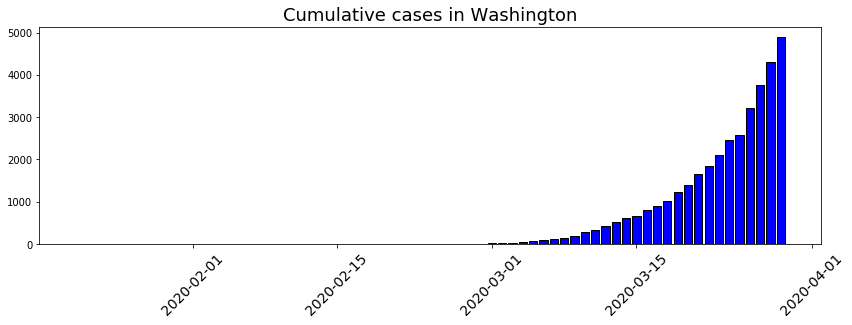

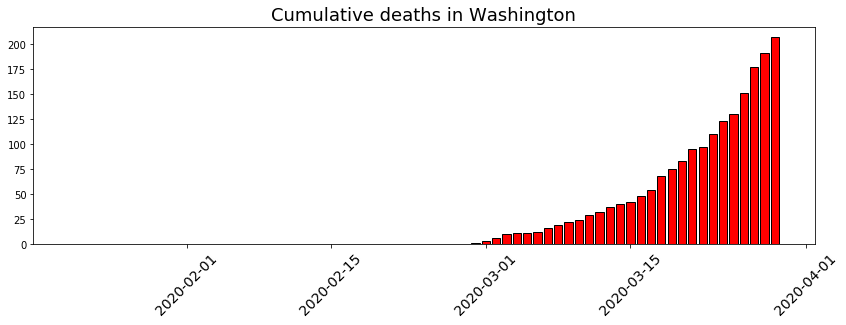

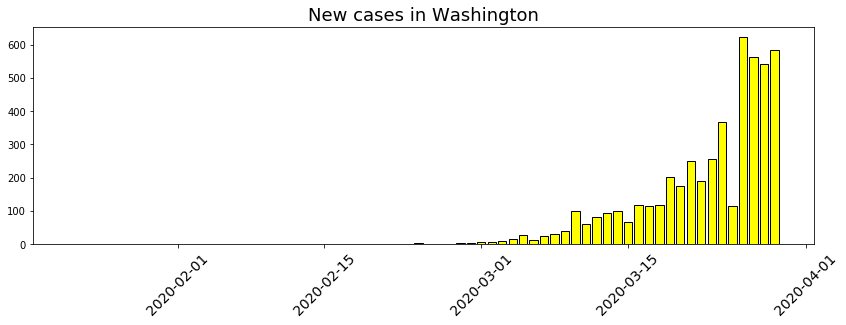

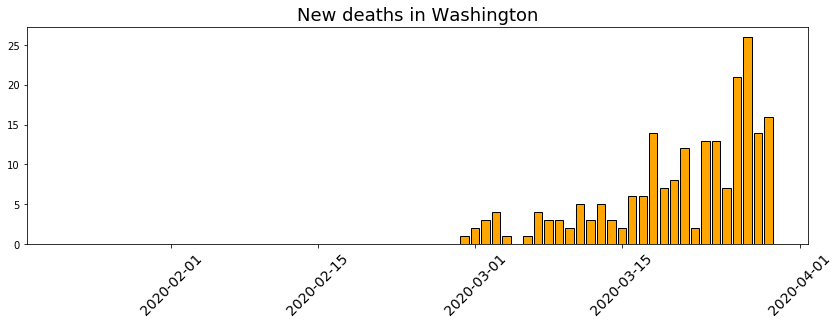

In [14]:
n.plot_state('Washington')

### Plotting California data for the last 30 days

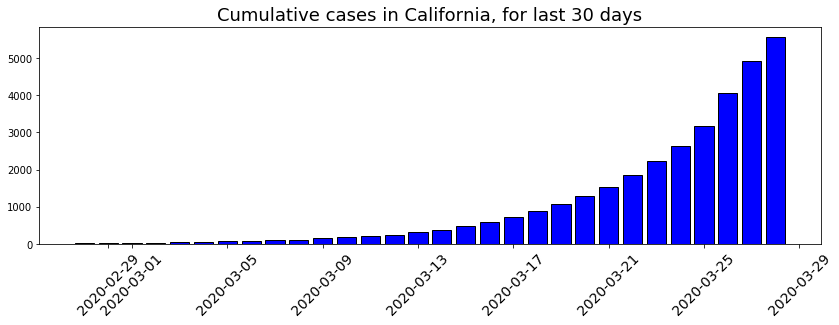

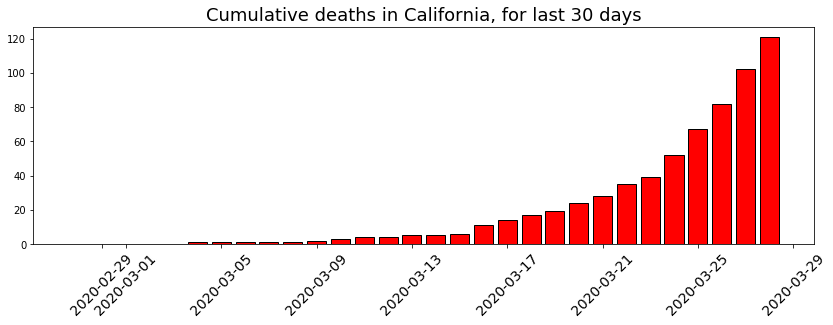

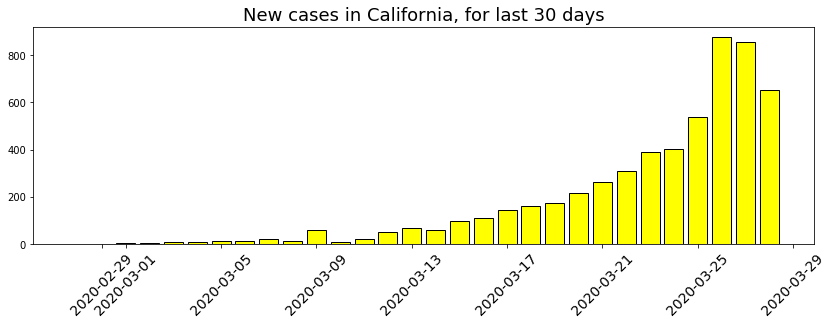

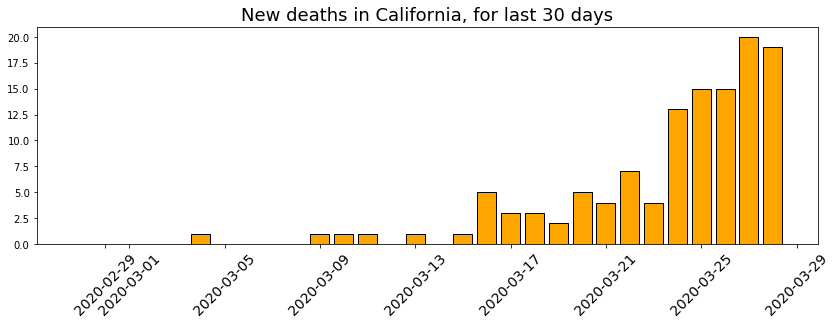

In [15]:
n.plot_state('California',last_30_days=True)

### Plotting line charts of multiple states together

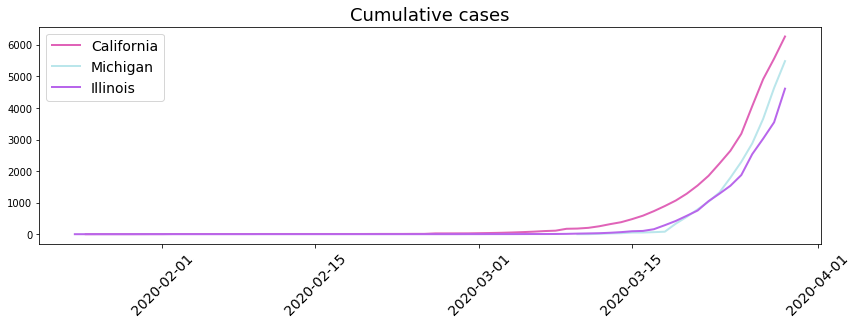

In [16]:
n.plot_multi_state(states=['California','Michigan','Illinois'],last_30_days=False)

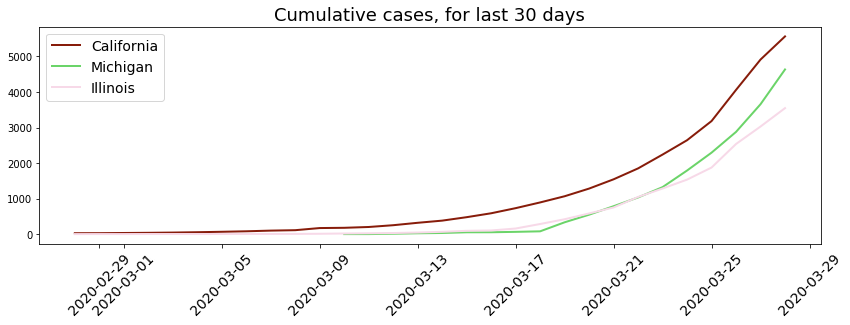

In [17]:
n.plot_multi_state(states=['California','Michigan','Illinois'],last_30_days=True)

### Plotting ranked bar charts of top few states

Plots bar charts (sorted) of top _N_ states where _N_ can be specified by the user. Also, the user can specify the date at which the ranking is displayed. If the date is not specified (i.e. `None`) then the latest data is used for ranking.

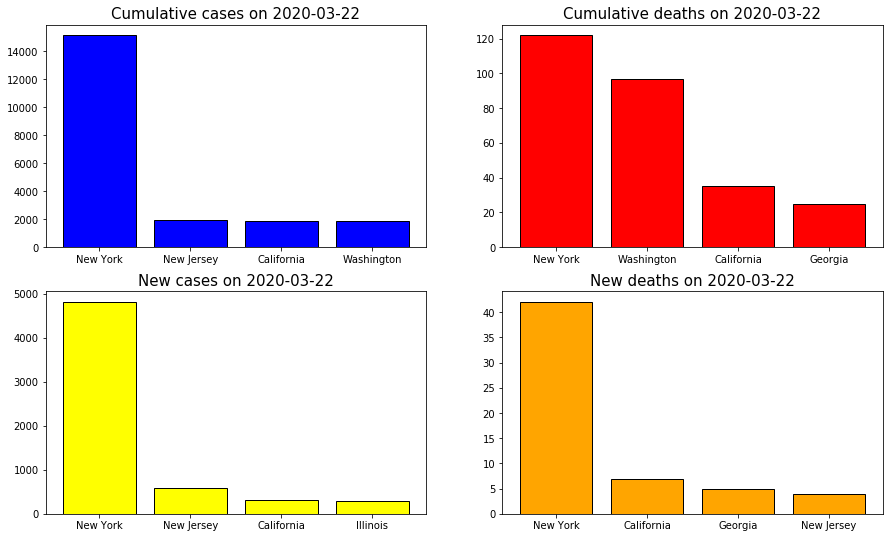

In [18]:
n.rankState(N=4,daterank='2020-03-22')

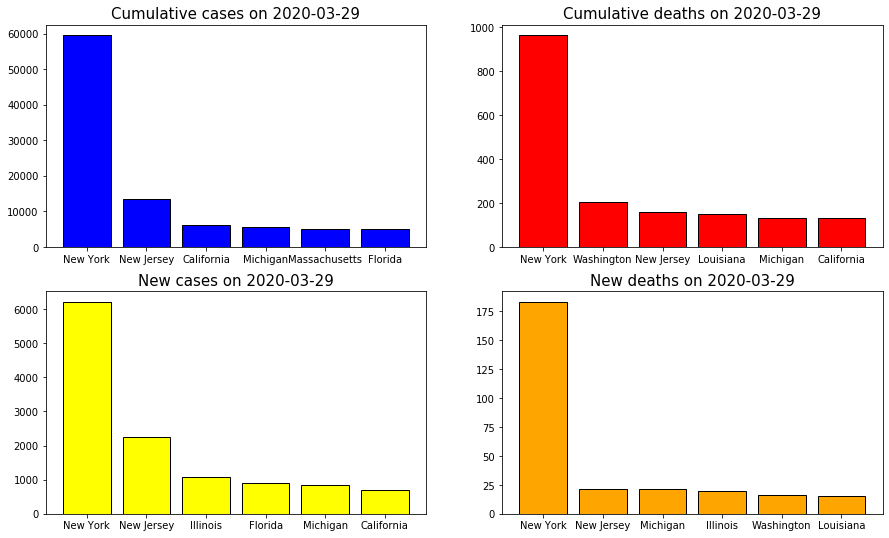

In [19]:
n.rankState(N=6)